In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
# raw data
energy = pd.read_csv('energy.csv')
guild_data = pd.read_csv('guild_data.csv')
payers = pd.read_csv('payers.csv')
# merged data
guild_merged = pd.read_csv('guild_merged.csv') # use this df instead of guild_data

In [3]:
energy.head(), energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   energy_delta  971 non-null    int64 
 1   context_type  971 non-null    object
 2   guild_id      971 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.9+ KB


(   energy_delta               context_type  guild_id
 0       1148686  GuildMissionRewardContext     90166
 1       1018116  GuildMissionRewardContext     81283
 2        907440  GuildMissionRewardContext     79262
 3        889109  GuildMissionRewardContext     84667
 4        858954  GuildMissionRewardContext     77241,
 None)

In [4]:
guild_data.head(), guild_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datetime                965 non-null    object 
 1   creator_character_id    965 non-null    int64  
 2   guild_id                965 non-null    int64  
 3   n_added_characters      965 non-null    int64  
 4   n_removed_characters    866 non-null    float64
 5   n_talents               672 non-null    float64
 6   level                   572 non-null    float64
 7   n_missions_completed    895 non-null    float64
 8   n_times_flag_turned_on  81 non-null     float64
 9   mean_place              59 non-null     float64
 10  mean_rating             59 non-null     float64
 11  n_seasons               59 non-null     float64
dtypes: float64(8), int64(3), object(1)
memory usage: 90.6+ KB


(              datetime  creator_character_id  guild_id  n_added_characters  \
 0  2022-12-12 23:13:42              15092203     78698                   1   
 1  2022-12-12 22:29:09              15961764     78604                   2   
 2  2022-12-12 21:01:53              16187808     78510                  27   
 3  2022-12-12 00:16:52              21618959     77899                  42   
 4  2022-12-12 22:13:50              23341705     78557                   6   
 
    n_removed_characters  n_talents  level  n_missions_completed  \
 0                   1.0        NaN    NaN                   NaN   
 1                   2.0        NaN    NaN                   NaN   
 2                  19.0        9.0    2.0                 171.0   
 3                  35.0       12.0    3.0                 171.0   
 4                   6.0        4.0    2.0                 156.0   
 
    n_times_flag_turned_on  mean_place  mean_rating  n_seasons  
 0                     NaN         NaN          N

In [5]:
guild_merged.head(), guild_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              965 non-null    int64  
 1   datetime                965 non-null    object 
 2   creator_character_id    965 non-null    int64  
 3   guild_id                965 non-null    int64  
 4   n_added_characters      965 non-null    int64  
 5   n_removed_characters    965 non-null    int64  
 6   n_talents               965 non-null    int64  
 7   level                   965 non-null    int64  
 8   n_missions_completed    965 non-null    int64  
 9   n_times_flag_turned_on  965 non-null    int64  
 10  mean_place              59 non-null     float64
 11  mean_rating             965 non-null    float64
 12  n_seasons               965 non-null    int64  
 13  n_characters            965 non-null    int64  
 14  energy_delta            965 non-null    fl

(   Unnamed: 0             datetime  creator_character_id  guild_id  \
 0           0  2022-12-12 23:13:42              15092203     78698   
 1           1  2022-12-12 22:29:09              15961764     78604   
 2           2  2022-12-12 21:01:53              16187808     78510   
 3           3  2022-12-12 00:16:52              21618959     77899   
 4           4  2022-12-12 22:13:50              23341705     78557   
 
    n_added_characters  n_removed_characters  n_talents  level  \
 0                   1                     1          0      1   
 1                   2                     2          0      1   
 2                  27                    19          9      2   
 3                  42                    35         12      3   
 4                   6                     6          4      2   
 
    n_missions_completed  n_times_flag_turned_on  mean_place  mean_rating  \
 0                     0                       0         NaN          0.0   
 1                  

In [6]:
payers.head(), payers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20430 entries, 0 to 20429
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   revenue       20420 non-null  float64
 1   character_id  20430 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 319.3 KB


(      revenue  character_id
 0  102.897877      13642352
 1  105.839569      29703528
 2   50.040612      28081545
 3   18.044814      12663426
 4    5.913989      16071934,
 None)

## Description of the dataset

In our free-to-play MMO RPG, players can form guilds, gaining access to additional in-game features such as:
- participation in guild wars,
- participation in raids,
- completing missions.

The cost to create a guild is relatively low, using in-game currency, so any player who reaches level 8 can create a guild. The guild creator immediately becomes its leader, with the ability to invite new members or remove them. Every guild member receives boosts (depending on the guild's level) and access to the guild shop with unique items—purchased using guild currency.

As the game progresses, the guild can level up by learning talents. Learning talents requires energy, which can be earned from various sources:
- completing quests,
- participating in raids,
- converting a member's knowledge into guild energy.

The development team is keen on players forming and developing guilds, inviting new members, helping them level up and grow, and fostering friendships. This, in turn, increases engagement and retention of both old and new players. It is important to note that the activity within a guild is driven by the enthusiasm of its members, initially stimulated by the guild leader.

Accepted for analysis were guilds created in November and December 2022, and guild activity was tracked for 90 days from the date of creation.

**guild_data.csv** – File with guild data. Data description:
- `guild_created.datetime` – date the guild was created
- `guild_created.creator_character_id` – ID of the character who created the guild
- `guild_created.guild_id` – guild ID
- `n_added_characters` – total number of members invited to the guild
- `n_removed_characters` – total number of members removed from the guild
- `n_talents` – total number of talents learned
- `level` – highest level achieved by the guild (guild starts at level 1, level-up events are recorded in the database)
- `n_missions_completed` – total number of missions completed by the guild
- `n_times_flag_turned_on` – total number of times the flag for guild war participation was turned on
- `mean_place` – average place in guild wars
- `mean_rating` – average rating of the guild in guild wars
- `n_seasons` – total number of war seasons participated in

**energy.csv** – Guild energy acquisition. Data description:
- `energy_delta` – amount of energy received during the period
- `guild_id` – guild ID
- `context_type` – type of energy source

**payers.csv** – Total payments of characters. Data description:
- `total_payments` – total payments in USD
- `character_id` – character ID

## 1. Perform exploratory data analysis

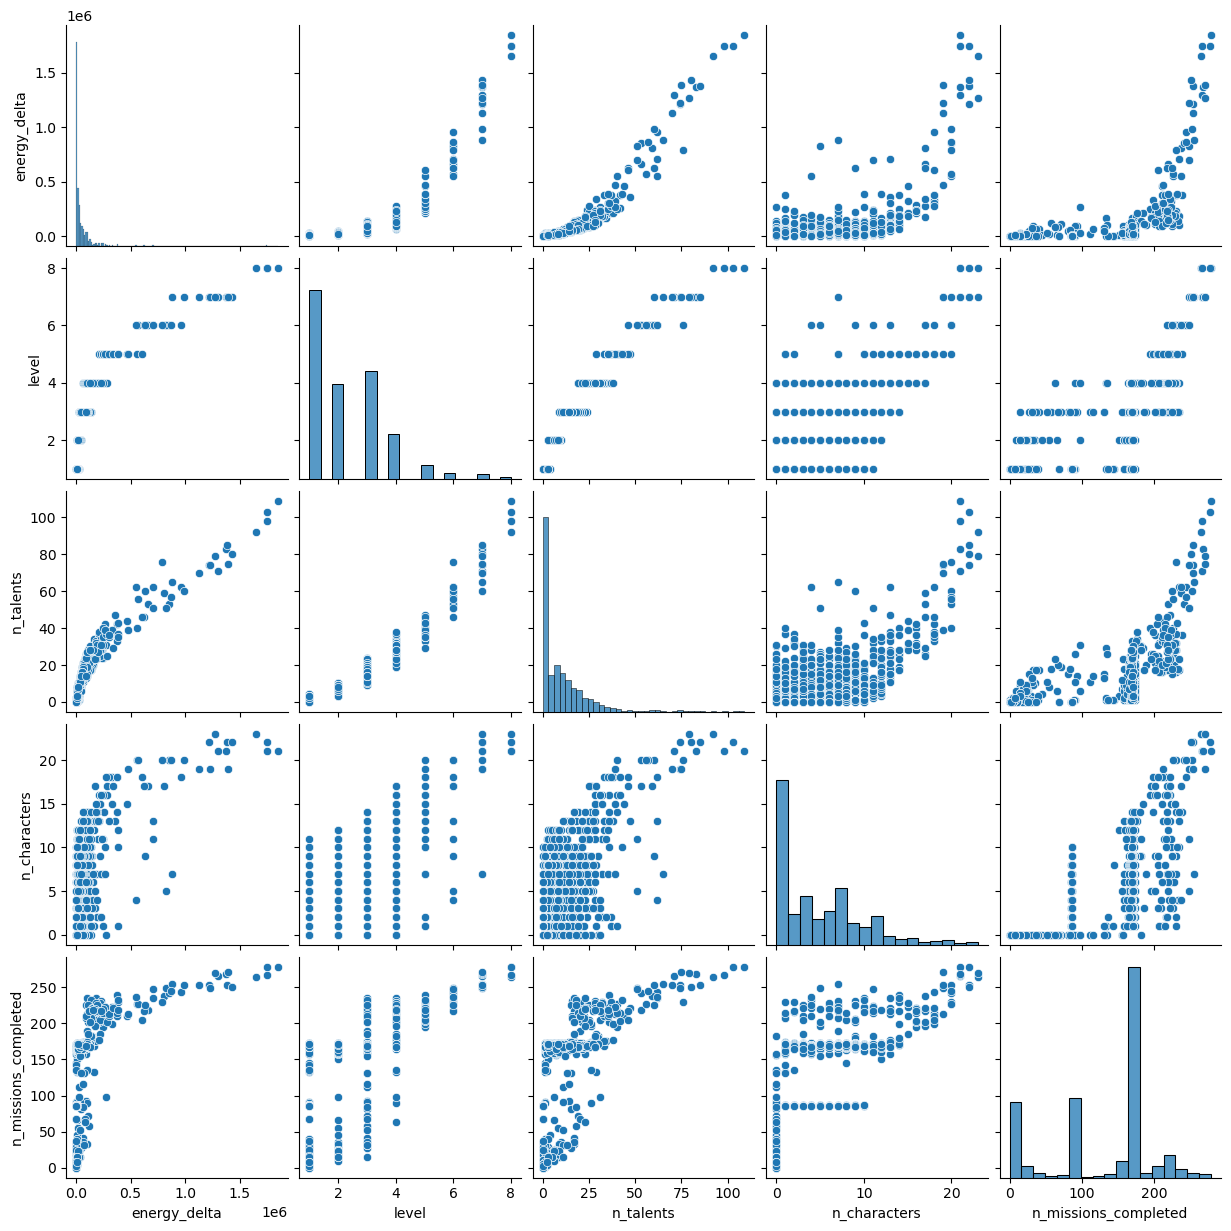

In [7]:
sns.pairplot(guild_merged[['energy_delta', 'level', 'n_talents', 'n_characters', 'n_missions_completed']])

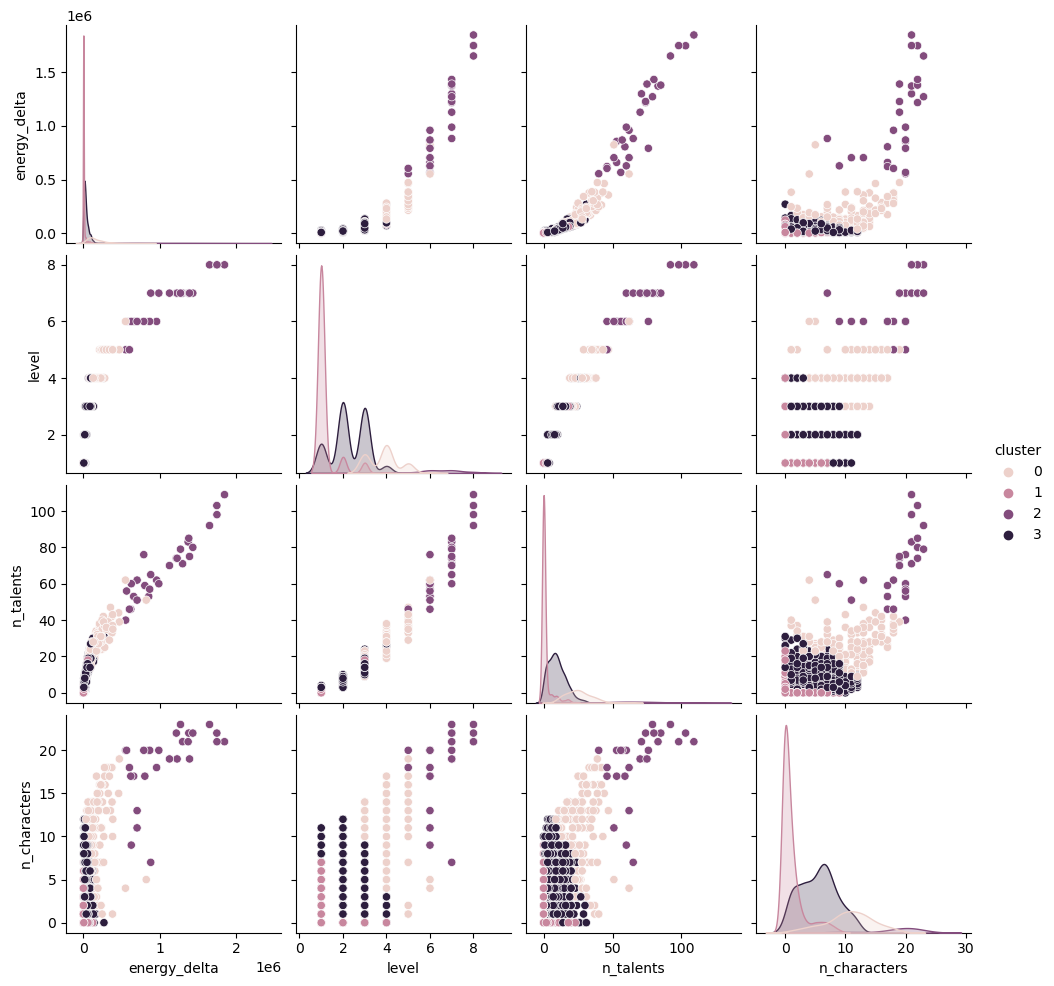

In [8]:
sns.pairplot(guild_merged[['energy_delta', 'level', 'n_talents', 'n_characters', 'cluster']], hue='cluster')

In [9]:
np.mean(guild_merged[guild_merged['cluster'] == 2])

C:\ProgramData\anaconda3\envs\nlp37\lib\site-packages\numpy\core\fromnumeric.py:3332: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Unnamed: 0                4.098929e+02
creator_character_id      2.203377e+07
guild_id                  7.107057e+04
n_added_characters        1.030000e+02
n_removed_characters      8.435714e+01
n_talents                 6.925000e+01
level                     6.607143e+00
n_missions_completed      2.477500e+02
n_times_flag_turned_on    5.000000e-01
mean_place                1.831250e+01
mean_rating               1.306429e+02
n_seasons                 3.214286e-01
n_characters              1.864286e+01
energy_delta              1.067827e+06
cluster                   2.000000e+00
is_premuim                6.428571e-01
dtype: float64

1.	Perform exploratory data analysis (use some descriptive statistics, and visualization tools)

2.	Apply the necessary statistical methods and approaches for inference based on your data set.

•	Write research questions and propose statistical methods that you will use to answer these questions.
 Please check all assumptions of the proposed method. If all assumptions are satisfied, then perform the analyses by using the proposed methods.  
•	If the assumptions are not met then propose a solution and implement your solution proposal.


3 All the analyses you need to think about and apply in this project are as follows. 

1. INFERENCES ABOUT MEAN (One sample hypothesis testing)
2. COMPARISONS OF MEANS (Two-sample hypothesis testing)
3. INFERENCES ABOUT PROPORTIONS (One sample hypothesis testing)
4. COMPARISONS OF PROPORTIONS (Two-sample hypothesis testing)
5. SIMPLE AND MULTIPLE LINEAR REGRESSION
6. ONE-WAY or TWO-WAY ANOVA AND MULTIPLE COMPARISONS



## 2. Statistical analyses 

Possible analyses:
1. Average energy
2. Compare energy (payers vs non-payers) or (active vs non-active)
3. Paying share or active giulds share
4. Compare active guilds share (paying vs non-paying)
5. Energy ~ Level + n_chars + ... (choose significant factors and apply transformations if needed)
6. Compare variances between groups (clusters) or check glm coefficients.

### 1. Inference about mean

In [10]:
np.mean(guild_merged[guild_merged['cluster'] == 1]['n_talents'])

1.3214285714285714

<AxesSubplot:xlabel='n_talents', ylabel='Count'>

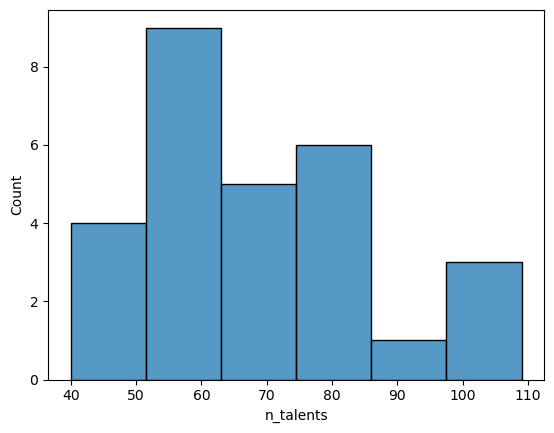

In [11]:
sns.histplot(guild_merged[guild_merged['cluster'] == 2]['n_talents'])

In [12]:
guild_merged.groupby('cluster').count()

,Unnamed: 0,datetime,creator_character_id,guild_id,n_added_characters,n_removed_characters,n_talents,level,n_missions_completed,n_times_flag_turned_on,mean_place,mean_rating,n_seasons,n_characters,energy_delta,is_premuim
cluster,,,,,,,,,,,,,,,,
0,155,155,155,155,155,155,155,155,155,155,30,155,155,155,155,155
1,364,364,364,364,364,364,364,364,364,364,0,364,364,364,364,364
2,28,28,28,28,28,28,28,28,28,28,8,28,28,28,28,28
3,418,418,418,418,418,418,418,418,418,418,21,418,418,418,418,418


In [13]:
stats.probplot(guild_merged[guild_merged['cluster'] == 2]['n_talents'], dist="norm")[0][1]

array([ 40,  46,  46,  51,  53,  53,  56,  57,  59,  60,  60,  62,  62,
        65,  70,  71,  74,  74,  75,  76,  79,  80,  83,  85,  92,  98,
       103, 109], dtype=int64)

((array([-2.93702766, -2.6502503 , -2.48862734, -2.37383857, -2.28377496,
         -2.20913468, -2.14508828, -2.08879364, -2.03843131, -1.99276366,
         -1.95090921, -1.91221703, -1.87619232, -1.84244974, -1.81068319,
         -1.78064526, -1.75213303, -1.72497793, -1.69903832, -1.674194  ,
         -1.65034206, -1.6273937 , -1.60527171, -1.58390852, -1.56324469,
         -1.54322758, -1.5238104 , -1.50495131, -1.48661278, -1.468761  ,
         -1.4513654 , -1.43439822, -1.41783423, -1.40165035, -1.38582549,
         -1.37034025, -1.35517682, -1.34031874, -1.32575079, -1.3114589 ,
         -1.29742997, -1.28365184, -1.27011319, -1.25680341, -1.24371263,
         -1.23083159, -1.21815159, -1.20566447, -1.19336258, -1.18123868,
         -1.16928597, -1.15749802, -1.14586875, -1.13439242, -1.12306358,
         -1.11187708, -1.10082801, -1.08991172, -1.07912379, -1.06846   ,
         -1.05791635, -1.04748902, -1.03717435, -1.02696887, -1.01686924,
         -1.00687229, -0.99697496, -0.

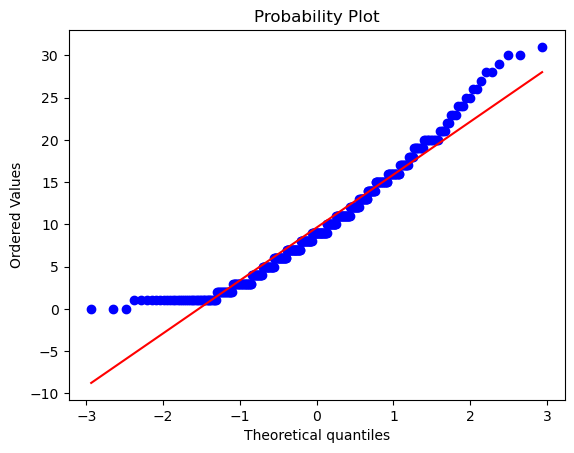

In [14]:
import pylab
stats.probplot(guild_merged[guild_merged['cluster'] == 3]['n_talents'], dist="norm", plot=pylab)

In [15]:
guild_merged[guild_merged['cluster'] == 1]

,Unnamed: 0,datetime,creator_character_id,guild_id,n_added_characters,n_removed_characters,n_talents,level,n_missions_completed,n_times_flag_turned_on,mean_place,mean_rating,n_seasons,n_characters,energy_delta,cluster,is_premuim
0,0,2022-12-12 23:13:42,15092203,78698,1,1,0,1,0,0,NaN,0.0,0,0,0.0,1,False
1,1,2022-12-12 22:29:09,15961764,78604,2,2,0,1,0,0,NaN,0.0,0,0,0.0,1,False
8,8,2022-12-12 20:06:29,25081103,78416,1,1,0,1,2,0,NaN,0.0,0,0,280.0,1,False
9,9,2022-12-12 15:29:23,25567139,78228,11,11,0,1,8,0,NaN,0.0,0,0,6440.0,1,True
11,11,2022-12-12 22:31:00,25652331,78651,1,0,0,1,86,0,NaN,0.0,0,1,0.0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,951,2022-11-04 14:21:02,20697556,51908,1,1,0,1,2,0,NaN,0.0,0,0,560.0,1,False
953,953,2022-11-04 15:06:56,20805380,51955,4,0,0,1,86,0,NaN,0.0,0,4,840.0,1,True
956,956,2022-11-10 01:09:53,15188366,54352,5,3,0,1,86,0,NaN,0.0,0,2,1120.0,1,False
958,958,2022-11-10 21:57:25,19510779,54634,4,4,0,1,37,0,NaN,0.0,0,0,2240.0,1,False


Check hypothesis that average n_talents of empty guilds is not greater that 1

$$
H_0: \mu = 1
$$
$$
H_1: \mu > 1
$$

where $\mu$ - average of n_talents and $\mu_0$ -- our estimation

In [16]:
stats.ttest_1samp(guild_merged[guild_merged['cluster'] == 1]['n_talents'], 1.0, alternative='greater')

Ttest_1sampResult(statistic=1.664147307695447, pvalue=0.04847296659422407)

### 2. Comparisons of means

Check hypothesis that avrage energy of guilds created by paying players are greater than one of non-paying

$$
H_0: \mu_1 = \mu_2
$$
$$
H_1: \mu_1 > \mu_2
$$

where $\mu_1$ - created by paying, and $\mu_0$ - non-paying

In [17]:
guild_merged['is_premuim'].value_counts()

False    637
True     328
Name: is_premuim, dtype: int64

In [18]:
stats.ttest_ind(guild_merged[guild_merged['is_premuim'] == True]['energy_delta'], guild_merged[guild_merged['is_premuim'] == False]['energy_delta'])

Ttest_indResult(statistic=2.6837505300140525, pvalue=0.007405044920973224)

Check hypothesis that avrage energy of active guilds are greater than one of inactive

$$
H_0: \mu_1 = \mu_2
$$
$$
H_1: \mu_1 > \mu_2
$$

where $\mu_1$ - active, and $\mu_0$ - inactive

### 3. Inferences about proportions

Проверим вторую гипотезу на уровне значимости 5%

$$
H_0: p= p_0
$$
$$
H_1: p > p_0
$$

где $p_0$ - paying share для активных гильдий, а $p_1$ -- неактивных

### 4. Comparisons of proportions

Проверим вторую гипотезу на уровне значимости 5%

$$
H_0: p_1 = p_2
$$
$$
H_1: p_1 > p_2
$$

где $p_1$ - paying share для активных гильдий, а $p_2$ -- неактивных

In [19]:
inactive_clusters = [1, 3]
active_clusters = [0, 2]

In [20]:
n_active_premium = guild_merged[(guild_merged['cluster'].isin(active_clusters)) & (guild_merged['is_premuim'] == True)].shape[0]
n_inactive_premium = guild_merged[(~guild_merged['cluster'].isin(active_clusters)) & (guild_merged['is_premuim'] == True)].shape[0]
n_active =  guild_merged[guild_merged['cluster'].isin(active_clusters)].shape[0]
n_inactive =  guild_merged[~guild_merged['cluster'].isin(active_clusters)].shape[0]
n_active_premium / n_active, n_inactive_premium /n_inactive

(0.3825136612021858, 0.329923273657289)

In [21]:
from statsmodels.stats.proportion import proportions_ztest

In [22]:
count = np.array([n_active_premium, n_inactive_premium])
nobs = np.array([n_active, n_inactive])
stat, pval = proportions_ztest(count, nobs, alternative = 'larger')
print('{0:0.3f}'.format(pval))

0.088


### 5. Simple and multiple linear regression

In [219]:
# Load modules and data
import statsmodels.api as sm

y = guild_merged['energy_delta']
X = guild_merged[['n_talents', 'n_characters', 'n_missions_completed']]
X = sm.add_constant(X)

guild_merged[['energy_delta', 'level', 'n_talents', 'n_characters', 'n_added_characters', 'n_removed_characters', 'n_missions_completed']].to_csv('data.csv')


model = sm.OLS(y, X).fit()

In [220]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           energy_delta   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     1500.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:40:41   Log-Likelihood:                -12301.
No. Observations:                 965   AIC:                         2.461e+04
Df Residuals:                     961   BIC:                         2.463e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3520.0726 

In [221]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                   4.399606
n_talents               1.975663
n_characters            2.407612
n_missions_completed    2.224934
dtype: float64